# Exploratory Data Analysis of OVID Covid-19 Dataset

## Introduction
This notebook is for performing Exploratory Data Analysis (EDA) on the COVID-19 dataset to understand the structure of the data, clean and preprocess it, and extract any insights that could help with our risk classification task. We will:
- Load and inspect the dataset
- Clean and preprocess it
- Analyze univariate, time series, and bivariate relationships
- Engineer features which may become useful for classification
---
## Data Loading and Inspection

We start by importing necessary libraries and loading the dataset. File paths may be adjusted as needed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset
data = pd.read_csv('../data/owid_covid_data.csv', parse_dates=['date'])

# Display the first few rows
print("First 5 rows of the dataset:")
display(data.head())

# Display data information and summary statistics
print("Dataset Information:")
data.info()

print("\nSummary Statistics:")
display(data.describe())

First 5 rows of the dataset:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    429435 non-null  object        
 1   continent                                   402910 non-null  object        
 2   location                                    429435 non-null  object        
 3   date                                        429435 non-null  datetime64[ns]
 4   total_cases                                 411804 non-null  float64       
 5   new_cases                                   410159 non-null  float64       
 6   new_cases_smoothed                          408929 non-null  float64       
 7   total_deaths                                411804 non-null  float64       
 8   new_deaths                                  410608 no

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,429435,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,2022-04-21 01:06:25.463691008,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060873,112096.199396,122.357074,122.713844,...,33.097723,50.649264,3.106912,73.702098,0.722139,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666400
min,2020-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,2021-03-05 00:00:00,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100500,0.000000,0.000000,...,22.600000,20.859000,1.300000,69.500000,0.602000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.872242
50%,2022-04-20 00:00:00,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.475000,0.000000,2.794000,...,33.100000,49.542000,2.500000,75.050000,0.740000,6.336393e+06,6.815199e+03,8.130000,5.660000,1270.801400
75%,2023-06-08 00:00:00,7.582720e+05,0.000000e+00,3.132860e+02,9.574000e+03,0.000000,3.143000,156770.190000,0.000000,56.253000,...,41.500000,82.502000,4.210000,79.460000,0.829000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.024150
max,2024-08-14 00:00:00,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.515000
std,NaN,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636567,162240.412419,1508.778583,559.701638,...,13.853948,31.905375,2.549205,7.387914,0.148903,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892769


## Data Cleaning and Preprocessing

Here, we will look for missing values and clean the data if needed.

In [5]:
data = data[data['iso_code'].str.contains('USA')]

print("\nRows with USA iso_code: ...\n", data)
print("Missing values per column in USA set:")
print(data.isnull().sum())

print("\nMissing values after filling:")
print(data.isnull().sum())


Rows with USA iso_code: ...
        iso_code      continent       location       date  total_cases  \
403451      USA  North America  United States 2020-01-05          0.0   
403452      USA  North America  United States 2020-01-06          0.0   
403453      USA  North America  United States 2020-01-07          0.0   
403454      USA  North America  United States 2020-01-08          0.0   
403455      USA  North America  United States 2020-01-09          0.0   
...         ...            ...            ...        ...          ...   
405120      USA  North America  United States 2024-07-31  103436829.0   
405121      USA  North America  United States 2024-08-01  103436829.0   
405122      USA  North America  United States 2024-08-02  103436829.0   
405123      USA  North America  United States 2024-08-03  103436829.0   
405124      USA  North America  United States 2024-08-04  103436829.0   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
403451        0.0         

### Missing Data Summary (U.S. Subset)

After filtering the dataset to include only rows with iso_code == 'USA', we then conducted a missing value check across all columns. The results show no missing values in this subset, which indicates that the data is complete and ready for analysis without requiring imputation, forward or backward filling, or row/column removal.

This outcome aligns with out project rationale to focus specifically on the United States, due to its consistent and comprehensive COVID-19 reporting. We can now proceed with EDA using this clean subset.

## Exploratory Data Analysis (EDA)

The goal of this section will be to explore the structure and relationships in the dataset. We will conduct Univariate Analysis, Time Series Analysis, and Bivariate Analysis.

### 1. Univariate Analysis

This section examines each variable individually to understand their distribution, detect outliers, and identify potential transformations.

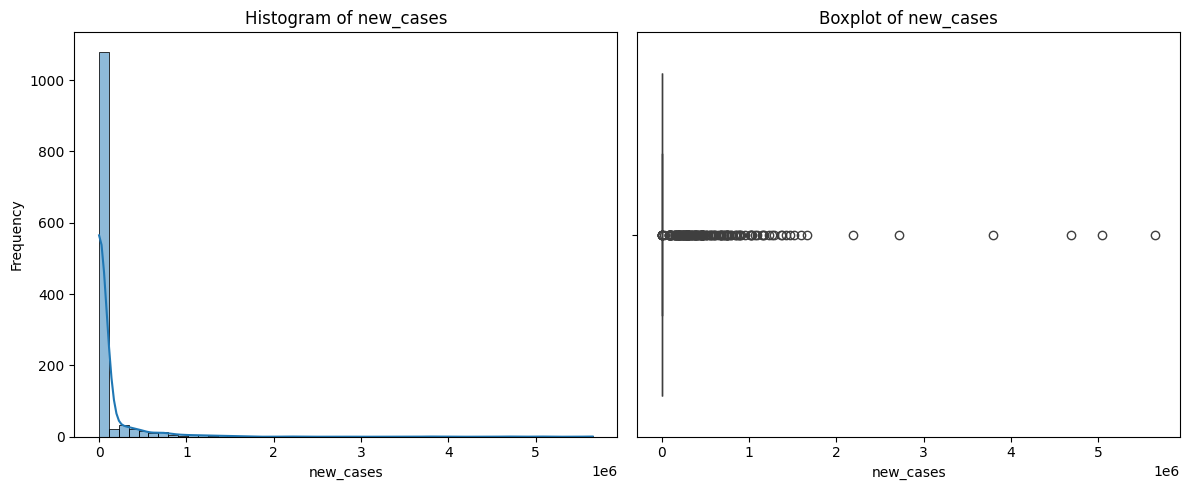

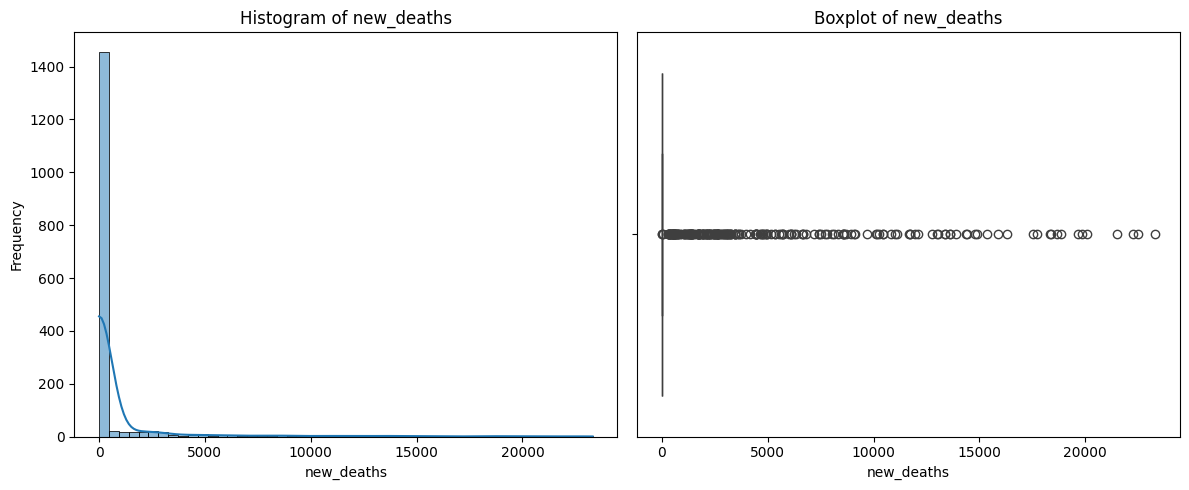

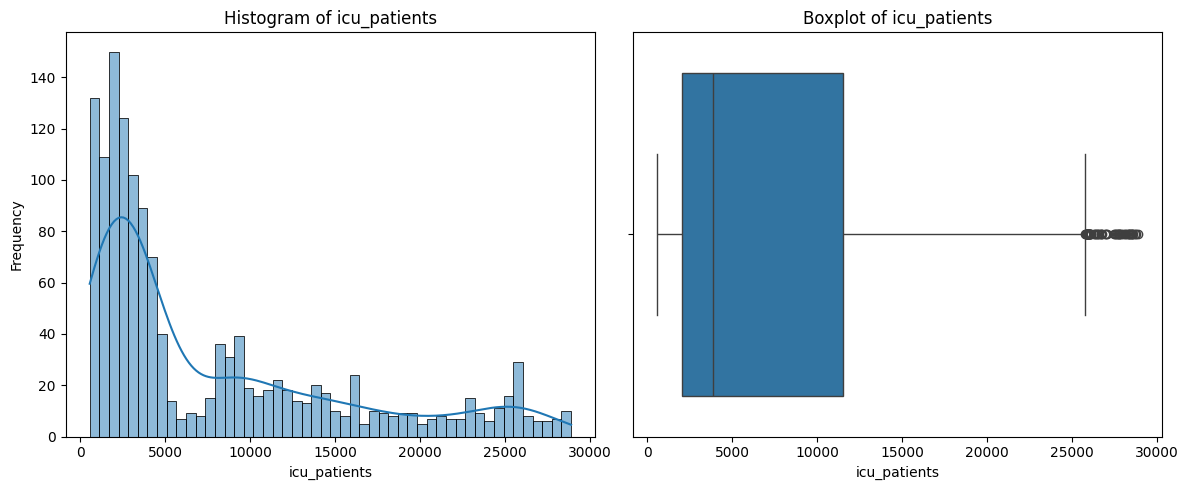

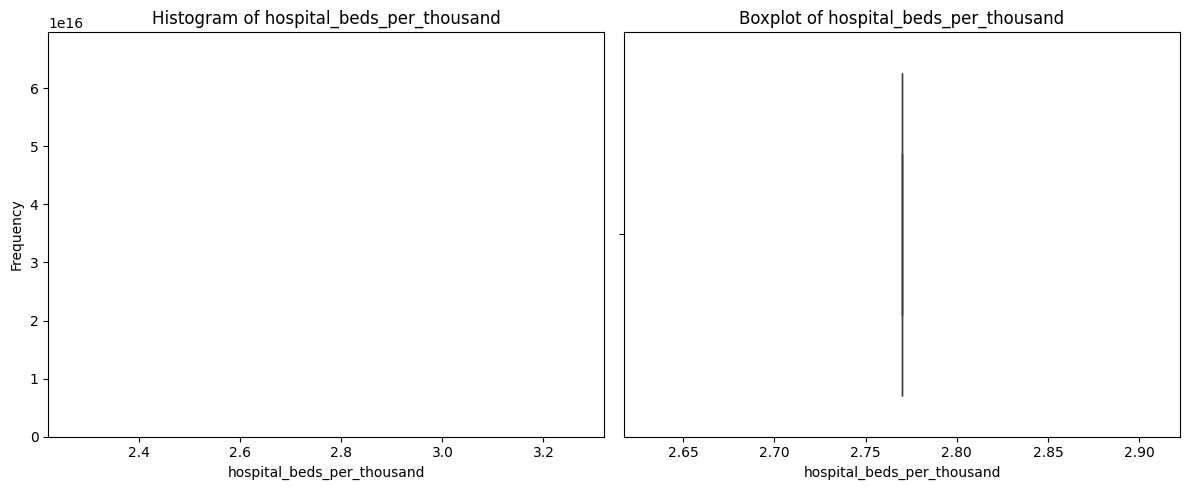

In [7]:
import seaborn as sns

# List of important univariate numerical columns
univariate_cols = ['new_cases', 'new_deaths', 'icu_patients', 'hospital_beds_per_thousand']

# Plot histograms + boxplots
for col in univariate_cols:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col].dropna(), bins=50, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

### Univariate Analysis Summary

Here, we analyzed four key features relevant to COVID trends in the United States: new_cases, new_deaths, icu_patients, and hospital_beds_per_thousand. Our goal is to understand the distribution, detect outliers, and assess suitability for predictive modeling.

🔹 new_cases
* Distribution: Strongly right-skewed, with a long tail.
* Outliers: Extreme values (for example, >1 million cases) are visible in the boxplot, likely corresponding to known surges such like the Omicron strain.
* Insight: Variance is very high, and spikes dominated the dataset. This may necessitate log transformation or outlier capping during preprocessing for good model performance.

🔹 new_deaths
* Distribution: Also right-skewed, with some moderate daily variation.
* Outliers: Several peaks during national surges and possible reporting artifacts.
* Insight: Death counts seem to follow case spikes with a lag, which is expected behavior. This will be useful for time-based feature engineering.

🔹 icu_patients
* Distribution: Multi-modal and moderately right-skewed, with a more natural spread compared to both case and death counts.
* Outliers: Present, but not extreme.
* Insight: A strong candidate for modeling COVID-19 severity, particularly for determining risk levels, may not need any transformation.

🔹 hospital_beds_per_thousand
* Distribution: Constant, value remains at 2.77 across all rows in the dataset.
* Outliers: The histogram and boxplot did not render meaningfully due to a complete lack of variance.
* Insight: This feature offers no discriminative power and will be dropped from the dataset.

Overall, our analysis confirms that:
* Several features contain significant outliers and skewness, which motivates the use of scaling or transformation.
* ICU patient counts appear most naturally distrubuted and valuable for downstream modeling.
* Static features like hospital_beds_per_thousand will be removed to streamline feature selection. 

### 2. Time Series Analysis

Here we will explore the evolution of key COVID-19 indicators over time to reveal trends, seasonality, and significant shifts.

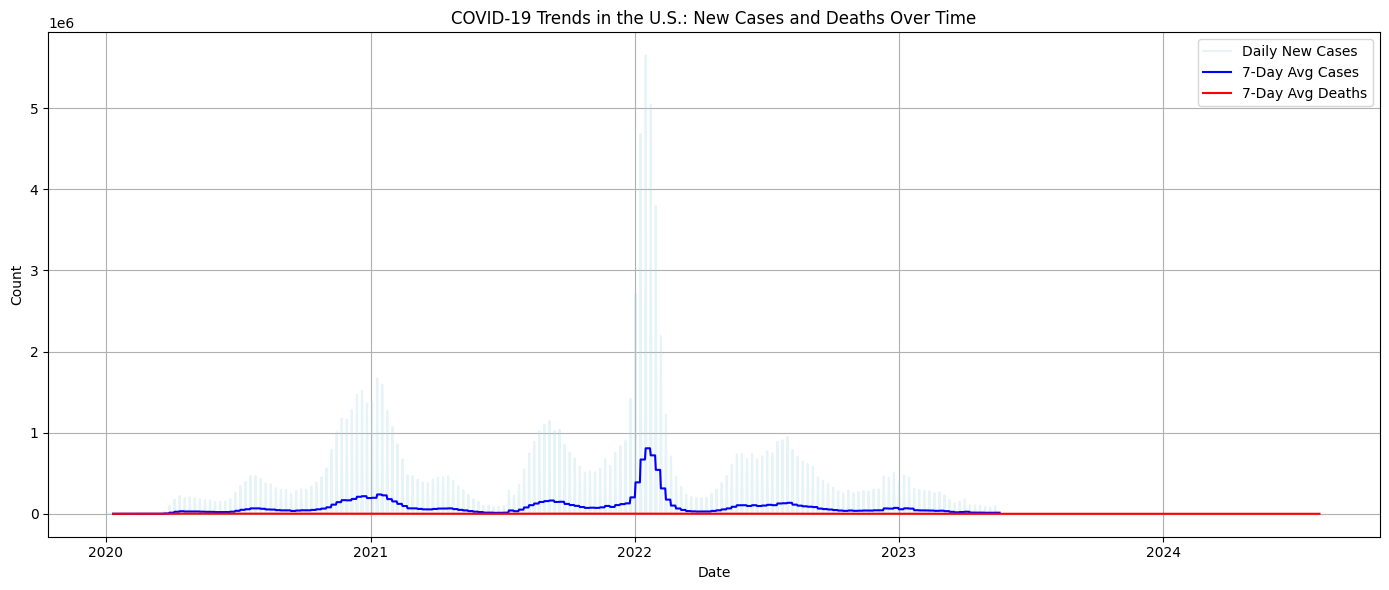

In [8]:
# Drop hospital_beds_per_thousand column, as explained in previous step.
data = data.drop(columns=['hospital_beds_per_thousand'])

# Create rolling averages to reduce noise
data['7_day_avg_cases'] = data['new_cases'].rolling(window=7).mean()
data['7_day_avg_deaths'] = data['new_deaths'].rolling(window=7).mean()

# Plot time series trends
plt.figure(figsize=(14, 6))
plt.plot(data['date'], data['new_cases'], color='lightblue', alpha=0.3, label='Daily New Cases')
plt.plot(data['date'], data['7_day_avg_cases'], color='blue', label='7-Day Avg Cases')
plt.plot(data['date'], data['7_day_avg_deaths'], color='red', label='7-Day Avg Deaths')

plt.title('COVID-19 Trends in the U.S.: New Cases and Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Time Series Analysis Summary

The generated time series plot shows the progression of the COVID-19 pandemic in the United States over time, focusing on daily new cases as well as daily new deaths, with both variables smoothed with a 7-day rolling average.

🔹 Observations:

* Multiple distinct waves are visible:
    * An early wave in late 2020.
    * A sharp surge around January 2022, corresponding to the Omicron variant, which reached a peak of over 5 million reported cases per day.
    * Several moderate waves between early 2021 and mid-2022.
* Daily deaths (plotted in red), follow a similar temporal pattern but lag behind new cases slightly, which is consistent with the progression of the disease.

🔹 Technical Insights:

* The 7-day rolling average successfully smooths out short-term reporting noise, like weekend delays.
* The disparity between cases and deaths is expected. Despite high case counts, the mortality rate decreased in later waves - possibly due to vaccinations as well as improved treatment strategies.
* From late 2023 onward, both case and death activity flatlines, suggesting either a true suppression of spread or gaps in reporting.

🔹 Modeling Implications:

* These waves provide a useful foundation for time or wave-based risk labels (like labeling time periods as "High" risk).
* Temporal trends and lag features (such as deaths lagging behind cases) should be incorporated into our modeling pipeline.
* Since COVID behavior is non-stationary over time, the model could benefit from temporal windowing or time-aware features like: rolling averages, rate of change, or lagged deaths/cases.

### 3. Bivariate and Multivariate Analysis

This section investigates the relationships among variables to find correlations and interactions to guide feature engineering and model selection.

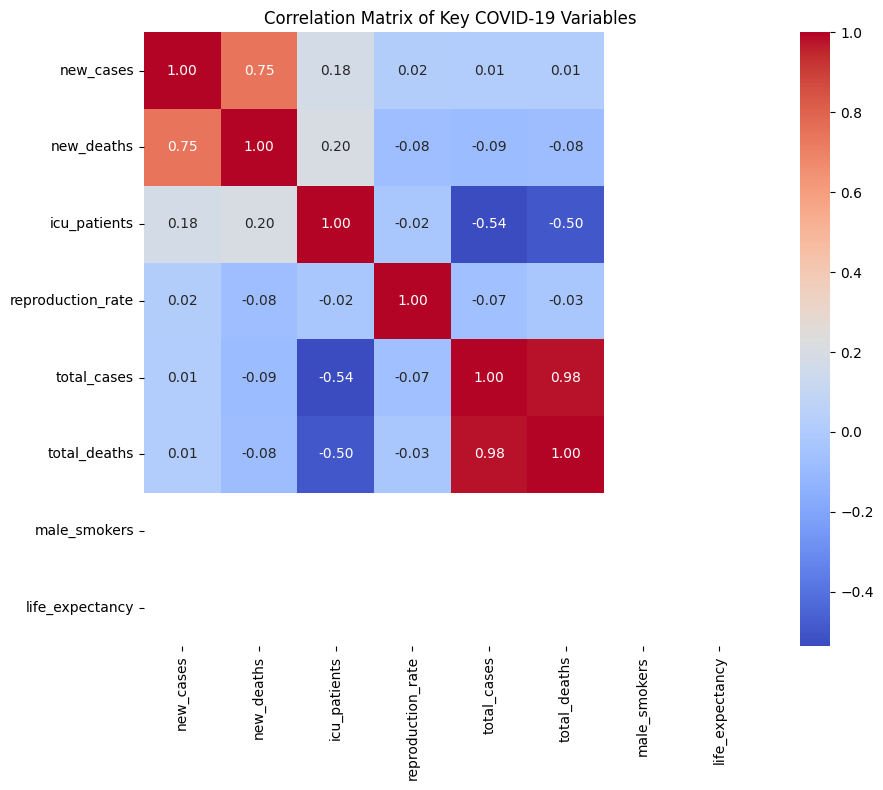

In [9]:
# Select relevant variables for multivariate analysis
correlation_vars = [
    'new_cases', 'new_deaths', 'icu_patients',
    'reproduction_rate', 'total_cases', 'total_deaths',
    'male_smokers', 'life_expectancy'
]

# Drop rows with NaNs in any of the selected columns
corr_data = data[correlation_vars].dropna()

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Key COVID-19 Variables')
plt.tight_layout()
plt.show()

### Bivariate and Multivariate Analysis Summary

The correlation matrix generated above helps us identify linear relationships between key COVID-19 indicators and demographic variables in the U.S. dataset. These insights are important for informing feature selection in the upcoming modeling phase.

🔹 Key Findings:

* new_cases and new_deaths show a strong positive correlation (0.75). This is expected, as rising case counts typically lead to increased deaths after a lag. Their strong linear relationships suggest they could be redundant unless lag is explicitly modeled.

* icu_patients is weakly correlated with both new_cases (0.18) and new_deaths (0.20), implying that ICU admissions don't always scale linearly with reported cases or deaths. This could be in part due to limited capacity, lagged reporting, or changes in hospitlization policies. 

* reproduction_rate is not significantly correlated with any single variable in this set (all values near zero). While it is conceptually important as a marker of viral spread, its weak correlation suggests it may have a nonlinear or temporal role, rather than predictive value on a day-to-day basis. 

* total_cases and total_deaths are very strongly correlated (0.98) and also negatively correlated with icu_patients. This suggests these cumulative metrics may not be useful as time-varying predictors, and are instead better interpreted as background context.

🔹 Modeling Implications:

* The high correlation between total_cases and total_deaths suggest that including both could introduce multicollinearity. We should keep only one or combine them into a new feature, like case_fatality_rate.

* The weak correlation of ICU metrics with other variables suggest they may still be valuable features, especially if the model is capable of capturing nonlinear patterns (such as trees or ensembles).

* reproduction_rate might be more effective when used in combination with lag features or smoothed over time (like 14-day moving averages).